In [2]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
print(len(os.listdir('phone_dataset/')))
path = 'phone_dataset/'

300


In [4]:
labels = pd.read_csv('train_labels.csv')

In [5]:
labels.shape

(300, 2)

In [6]:
def read_imgs(path, batch_len,height, width):
    ''' 
        path: path where is the set of imgs
        batch len: how many examples there'll be in the array
        width, height : dimensions of the output image.
        
        returns: numpy array wich contains an array of timeseries videos.
    '''
    
    video_set = np.empty((batch_len,30, width, height, 3))    
    #label_set = np.empty(batch_len).astype(int)
    for directory in range(batch_len):
        #label_set[directory] = int(get_label(directory))
        for img_in_dir in range(len(path+str(directory))):
            image_path = path + str(directory)+'/frame'+str(img_in_dir)
            img = cv2.imread(image_path + '.jpg')
            video_set[directory,img_in_dir,:,:,:] = cv2.resize(img,(640,480))
 
    return video_set

In [7]:
def get_img(path,height,width,norm = False):
    video_set = np.empty((30,width,height,3))
    count = 0
    for img_in_dir in os.listdir(path):
        img_path = path+img_in_dir
        img = cv2.imread(img_path)
        if norm:
            video_set[count,:,:,:] = cv2.resize(img,(height,width))/255
        else:
            video_set[count,:,:,:] = cv2.resize(img,(height,width)).astype(int)

        count+=1
    return video_set

In [8]:
def get_label(id_,labels):
    lab = labels.loc[int(id_)]['label']
    return lab


In [9]:
def tensor_generator(path,files,label_file,batch_size=16):
    while 1:
        batch_paths = np.random.choice(a = files ,size=batch_size)
        batch_input=[]
        batch_output=[]
        for input_path in batch_paths:
            input_ = get_img(path+input_path+'/',640,480,norm=True)
            output_ = get_label(input_path,label_file)
            batch_input+=[input_]
            batch_output+=[output_]
        batch_x = np.array(batch_input)
        batch_y = np.array(batch_output)
        yield (batch_x,batch_y)

In [12]:
pr = tensor_generator(path,os.listdir('phone_dataset'),labels)

In [15]:
print(next(pr))

(array([[[[[0.01960784, 0.        , 0.00784314],
          [0.21568627, 0.21960784, 0.18431373],
          [0.43921569, 0.42745098, 0.36078431],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],

         [[0.00784314, 0.        , 0.00784314],
          [0.21176471, 0.21960784, 0.18039216],
          [0.41960784, 0.40784314, 0.34117647],
          ...,
          [0.        , 0.00392157, 0.        ],
          [0.        , 0.00392157, 0.        ],
          [0.        , 0.00392157, 0.        ]],

         [[0.00392157, 0.        , 0.00392157],
          [0.18431373, 0.19215686, 0.15294118],
          [0.40784314, 0.38823529, 0.32941176],
          ...,
          [0.00784314, 0.00392157, 0.        ],
          [0.00784314, 0.        , 0.        ],
          [0.00784314, 0.        , 0.        ]],

         ...,

         [[0.02352941, 0.01176471, 0.        ],
          [0.03137255

In [98]:
path2 = 'phone_dataset/2/'
lala  = get_img(path2,640,480,norm=True)
id_  = path2.split('/')[1]
print(id_)
print(get_label(id_))
print(get_label(19))
#print(lala)

2
1
0


(480, 640, 3)


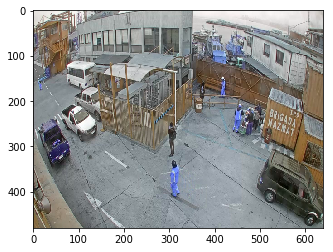

In [71]:
single_im = lala[1,:,:,:]
print(single_im.shape)
plt.imshow(single_im)

In [48]:
vid_set = read_imgs(path,1,640,480)


(480, 640, 3)


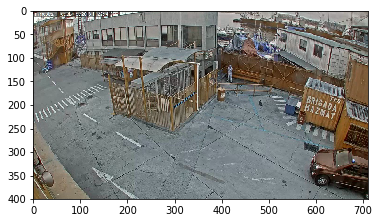

In [49]:
im = vid_set[0,27,:,:,:]
print(im.shape)
plt.imshow(im_test)

(400, 712, 3)


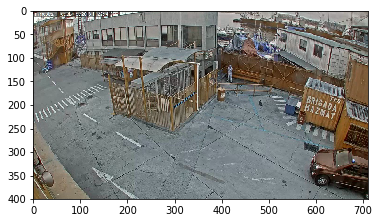

In [43]:
im_test = cv2.imread('phone_dataset/1/frame0.jpg')
print(im_test.shape)
plt.imshow(im_test)

In [ ]:
label_set = np.empty(5)
